# Classifying Fashion-MNIST

First of all, loading the dataset through torchvision

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

938
torch.Size([64, 1, 28, 28])
torch.Size([64])


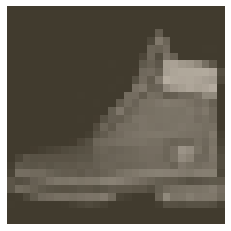

In [13]:
print(len(trainloader))
images,labels = next(iter(trainloader))
print(images.shape)
print(labels.shape)
helper.imshow(images[0])

## Building the network

In [4]:
from torch import nn
from torch import optim

In [20]:
# Defining the network architecture

# Hyperparameters
input_size = 784
hidden_sizes = [256,128,64]
output_size = 10   # Fashion-MNIST dataset has 10 classes of images  

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size,hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0],hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1],hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2],output_size)
        
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        
        # flattening the input tensor
        x = x.view(x.shape[0],-1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.logsoftmax(x)
        
        return x

In [21]:
# Creating the network, defining the criterion and optimizer

model = Network()

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [22]:
# Training the network

epochs = 5

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
    print(running_loss/len(trainloader))

tensor(0.5200, grad_fn=<DivBackward0>)
tensor(0.3918, grad_fn=<DivBackward0>)
tensor(0.3556, grad_fn=<DivBackward0>)
tensor(0.3317, grad_fn=<DivBackward0>)
tensor(0.3192, grad_fn=<DivBackward0>)


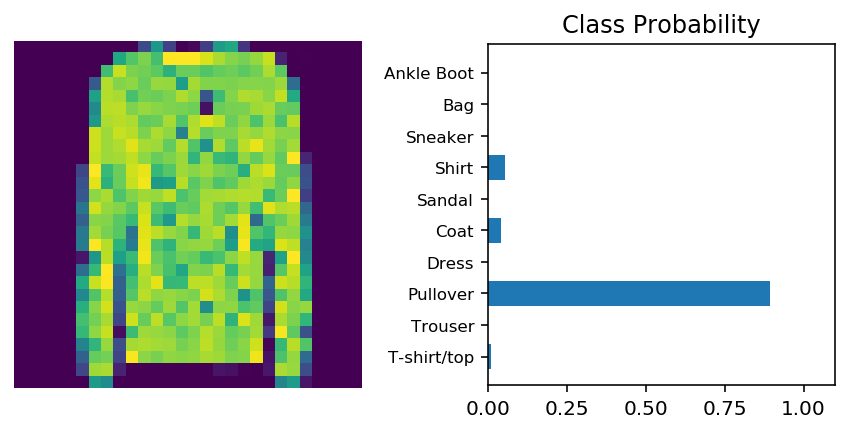

In [27]:
# Testing the network

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

images, labels = next(iter(trainloader))
img = images[1]

logps = model(img)
ps = torch.exp(logps)

import helper
helper.view_classify(img,ps,version='Fashion')